Bài toán Cauchy:

\begin{align*}
&Y = \begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}\\
&Y' = F(Y, t) = \begin{pmatrix}
f_1\\
f_2\\
\vdots\\
f_n
\end{pmatrix}\\
&Y(t_0) = Y_0
\end{align*}

Công thức Euler hiện 

$$
Y_{n+1} = Y_n + h Y'(n) = Y_n + h F(Y_n, t_n)
$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


Input: Thời điểm ban đầu $t_0$, bước lưới $h = d_t$, số lượng bước nhảy $N$, hàm $F(Y, t) = Y'$, điều kiện ban đầu $Y_0$

In [2]:
t_0 = 0
dt = 0.01
N = 1000

#y_0 và F(Y, t) phải có cùng số phần tử

# Điều kiện ban đầu
y_0 = np.array([1])

# F(Y, t)
def F(y, t):
    ans = np.copy(y)
    #ans[0] = (t+2*y[0])/(t*t+2*y[0]*y[0])
    ans[0] = -y[0]
    return ans



Số lượng xấp xỉ đầu và cuối muốn in ra

In [3]:
k = 3

Gói con giải bài toán Cauchy bằng Euler hiện, Kết quả trả ra 2 mảng
$$[t_0, t_1, \dots, t_n]$$
$$[Y_0, Y_1, \dots, Y_n]$$

In [4]:
def Euler_Forward(y, t):
    vector_y = np.array([y])
    vector_t = np.array([t])
    T = t + dt*N
    n = 0
    while n < N:
        vector_y = np.vstack((vector_y, vector_y[-1] + dt*F(vector_y[-1], vector_t[-1])))
        vector_t = np.append(vector_t, t+dt)
        n += 1
        t += dt
    
    return vector_y, vector_t

Lôi Euler hiện ra vụt 

In [5]:
ans_y, ans_t = Euler_Forward(y_0, t_0)

In kết quả ra rồi chém vào bài

t =  0.1 :	 Y[ 1 ]^T =  [1.1]
t =  0.2 :	 Y[ 2 ]^T =  [1.19465021]
t =  0.3 :	 Y[ 3 ]^T =  [1.28410985]
...
t =  2.8 :	 Y[ 28 ]^T =  [2.65855069]
t =  2.9 :	 Y[ 29 ]^T =  [2.69548726]
t =  3.0 :	 Y[ 30 ]^T =  [2.73162721]


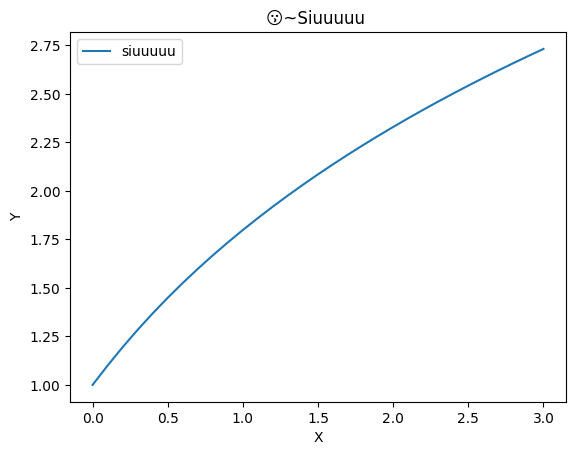

In [6]:
for i in range(k):
    print("t = ", round(ans_t[i+1], 3), ":\t Y[", i+1, "]^T = " , ans_y[i+1])

print("...")

for i in range(k):
    print("t = ", round(ans_t[-k+i], 3), ":\t Y[", N-k+i+1, "]^T = ", ans_y[-k+i])

# Vẽ đồ thị
ans_y = np.transpose(ans_y)

# Muốn vẽ gì thì sửa ở đây
plt.plot(ans_t, ans_y[0] - np.exp(-ans_t), label = 'y = y(x)') # Vẽ y_0 theo t
#plt.plot(ans_t, ans_y[0], label = 'siuuuuu') # Vẽ y_1 theo t

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('😗~Siuuuuu ')
plt.show()